**Gradient Boosting Regularization**

For Further Evaluation and Exploration

In consideration of the effect of various regularization strategies, I am using Gradient Boosting in the example.
 Example from Hastie et al 2009 [1].

Binomial Deviance, the loss function used applied. The process of Regularization via
shrinkage (``learning_rate < 1.0``) where performance is considerably greater.
Combined with shrinkage and stochastic gradient boosting
(``subsample < 1.0``). This can produce greater model accuracy by reducing the
variance through the process of bagging.
As evidenced, subsampling without shrinkage, is highly unfavorable.
A possible alternate strategy could be to  reduce the variance is by subsampling the features similar to the random splits performed in Random Forests(via the ``max_features`` parameter).

[1] T. Hastie, R. Tibshirani and J. Friedman, "Elements of Statistical
    Learning Ed. 2", Springer, 2009.
    Author: Peter Prettenhofer <peter.prettenhofer@gmail.com> # License: BSD 3 clause


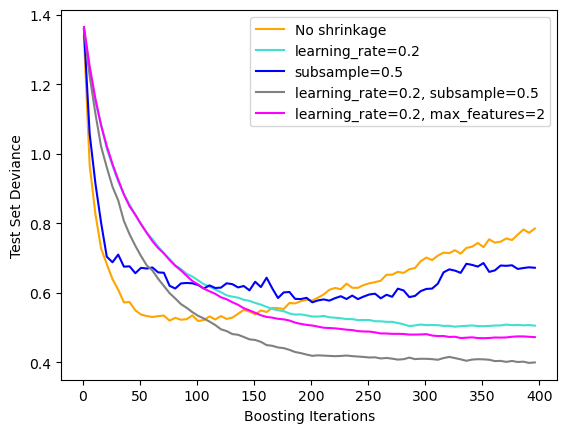

In [8]:
#Gradient Boosting Regularization

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

X, y = datasets.make_hastie_10_2(n_samples=4000, random_state=1)

#Customize dataset 
#X_custom, y_custom = load_your_custom_dataset(ML_Sample.csv)  # Replace with your actual data loading function
#X, y = datasets.ML_Sample.csv(n_samples=4000,random_state=1)


# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

plt.figure()

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        test_deviance[i] = 2 * log_loss(y_test, y_proba[:, 1])

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

